<a href="https://colab.research.google.com/github/roshnib1/chessboard/blob/main/chess2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # for image display
!pip install opencv-python-headless


In [4]:
from google.colab import files
uploaded = files.upload()


Saving ChatGPT Image Apr 21, 2025, 08_55_44 AM.png to ChatGPT Image Apr 21, 2025, 08_55_44 AM.png


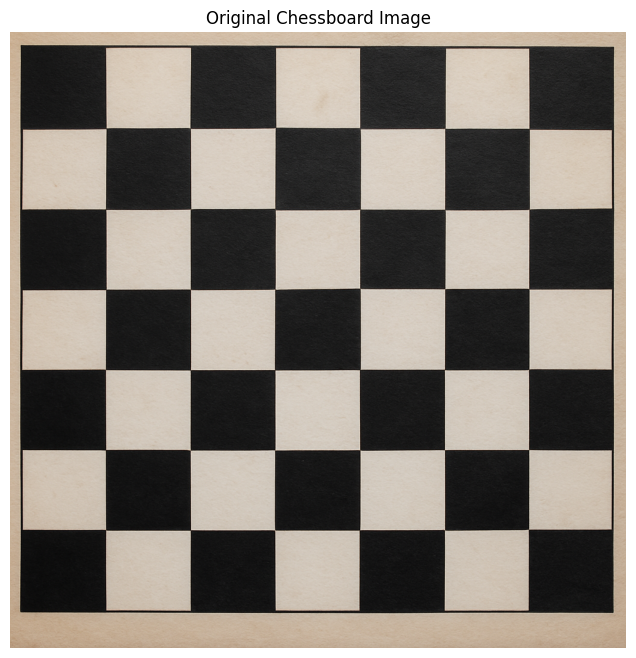

In [5]:
# Load image
image = cv2.imread('/content/image.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(8,8))
plt.imshow(image_rgb)
plt.title("Original Chessboard Image")
plt.axis('off')
plt.show()


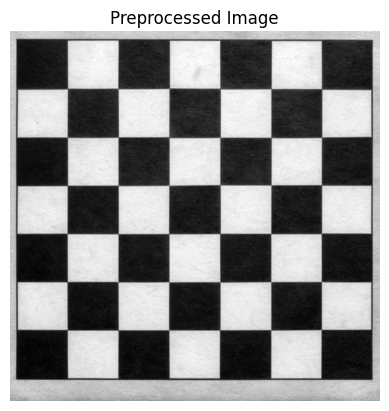

In [6]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Remove noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Normalize lighting (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized = clahe.apply(blur)

# Display
plt.imshow(equalized, cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()


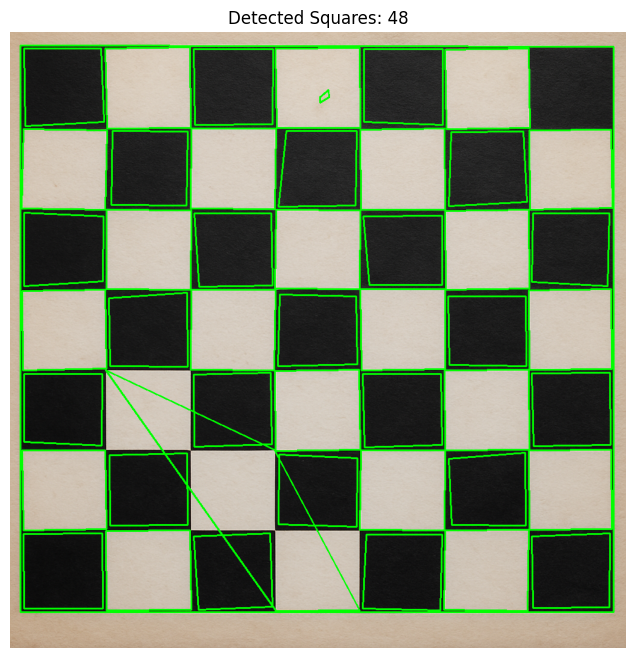

In [7]:
# Adaptive threshold
thresh = cv2.adaptiveThreshold(equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY_INV, 11, 3)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter square-like contours
squares = []
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.05 * cv2.arcLength(cnt, True), True)
    area = cv2.contourArea(cnt)
    if len(approx) == 4 and area > 100:
        squares.append(approx)

# Draw squares
output_img = image.copy()
cv2.drawContours(output_img, squares, -1, (0, 255, 0), 2)

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Squares: {len(squares)}")
plt.axis('off')
plt.show()


In [8]:
black = 0
white = 0

for square in squares:
    mask = np.zeros(gray.shape, dtype=np.uint8)
    cv2.drawContours(mask, [square], -1, 255, -1)
    mean_val = cv2.mean(gray, mask=mask)[0]

    if mean_val < 127:
        black += 1
    else:
        white += 1

print(f"🟫 Black Squares: {black}")
print(f"⬜ White Squares: {white}")


🟫 Black Squares: 25
⬜ White Squares: 23


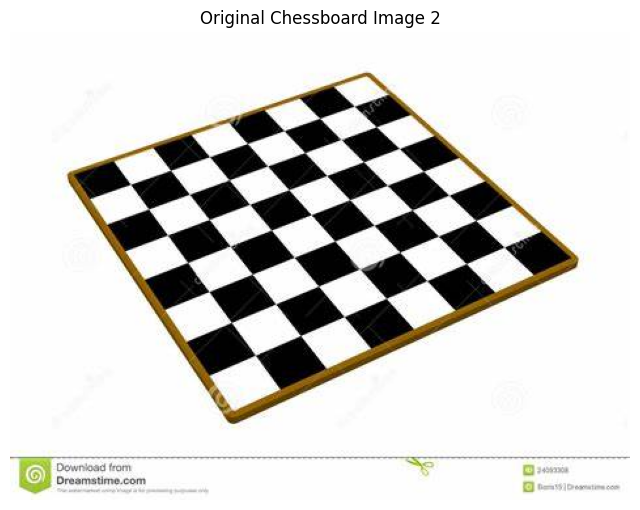

In [9]:
# Load second image
image2 = cv2.imread('/content/OIP (1).jpeg')
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(8, 8))
plt.imshow(image2_rgb)
plt.title("Original Chessboard Image 2")
plt.axis('off')
plt.show()


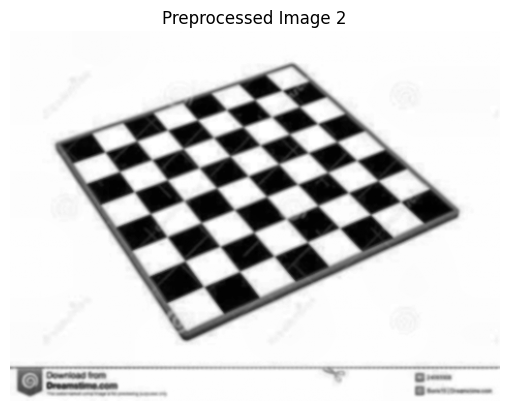

In [10]:
# Grayscale
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Gaussian blur
blur2 = cv2.GaussianBlur(gray2, (5, 5), 0)

# CLAHE for normalization
clahe2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized2 = clahe2.apply(blur2)

# Display
plt.imshow(equalized2, cmap='gray')
plt.title("Preprocessed Image 2")
plt.axis('off')
plt.show()


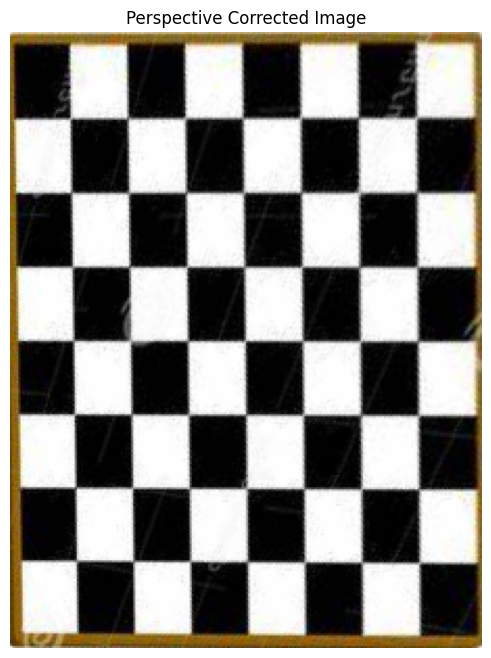

In [13]:
# Convert image to grayscale
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray2, 50, 150, apertureSize=3)

# Find contours in the edges
contours2, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area and keep the largest one (the chessboard)
contours2 = sorted(contours2, key=cv2.contourArea, reverse=True)
chessboard_contour = contours2[0]  # The largest contour is likely the chessboard

# Approximate the contour to get the 4 corners
epsilon = 0.02 * cv2.arcLength(chessboard_contour, True)
approx = cv2.approxPolyDP(chessboard_contour, epsilon, True)

# Check if we have 4 corners
if len(approx) == 4:
    # Get the points of the chessboard corners
    pts1 = np.float32([approx[0][0], approx[1][0], approx[2][0], approx[3][0]])

    # Define the destination points for the perspective correction (straightened image)
    width = max(int(np.linalg.norm(pts1[0] - pts1[1])), int(np.linalg.norm(pts1[2] - pts1[3])))
    height = max(int(np.linalg.norm(pts1[0] - pts1[3])), int(np.linalg.norm(pts1[1] - pts1[2])))

    pts2 = np.float32([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]])

    # Get the perspective transformation matrix
    matrix = cv2.getPerspectiveTransform(pts1, pts2)

    # Apply the perspective correction (warping)
    corrected_image = cv2.warpPerspective(image2, matrix, (width, height))

    # Show the corrected image
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
    plt.title("Perspective Corrected Image")
    plt.axis('off')
    plt.show()
else:
    print("Chessboard contour not detected correctly.")


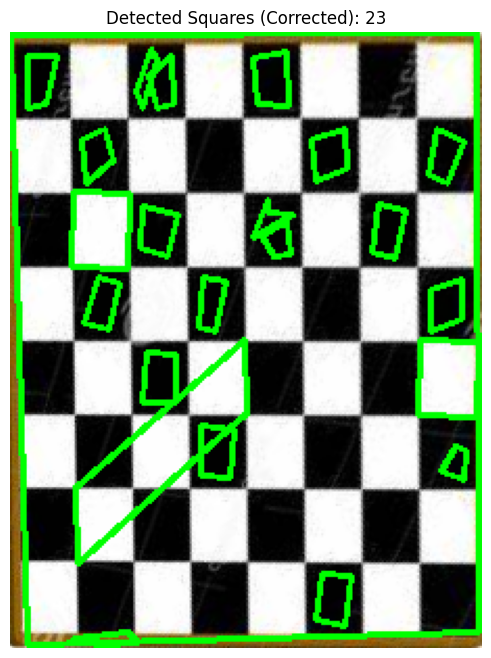

In [14]:
# Convert corrected image to grayscale
gray_corrected = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2GRAY)

# Apply adaptive threshold
thresh_corrected = cv2.adaptiveThreshold(gray_corrected, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY_INV, 11, 3)

# Find contours in the corrected image
contours_corrected, _ = cv2.findContours(thresh_corrected, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter and detect squares
squares_corrected = []
for cnt in contours_corrected:
    approx = cv2.approxPolyDP(cnt, 0.05 * cv2.arcLength(cnt, True), True)
    area = cv2.contourArea(cnt)
    if len(approx) == 4 and area > 100:
        squares_corrected.append(approx)

# Draw squares on the corrected image
output_corrected_img = corrected_image.copy()
cv2.drawContours(output_corrected_img, squares_corrected, -1, (0, 255, 0), 2)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(output_corrected_img, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Squares (Corrected): {len(squares_corrected)}")
plt.axis('off')
plt.show()


In [15]:
# Function to classify squares as black or white
def classify_squares(squares, image):
    black_squares = 0
    white_squares = 0

    for i, square in enumerate(squares):
        # Get the bounding box of each detected square
        x, y, w, h = cv2.boundingRect(square)

        # Crop the square from the image
        square_img = image[y:y+h, x:x+w]

        # Calculate the mean color of the square
        mean_color = cv2.mean(square_img)[:3]

        # Calculate the average brightness (mean of RGB values)
        avg_brightness = sum(mean_color) / 3

        # If the average brightness is below a certain threshold, classify it as black
        if avg_brightness < 127:
            black_squares += 1
        else:
            white_squares += 1

    return black_squares, white_squares

# Classify the squares in the corrected image
black_squares, white_squares = classify_squares(squares_corrected, corrected_image)

# Display the result
print(f"Detected Black Squares: {black_squares}")
print(f"Detected White Squares: {white_squares}")


Detected Black Squares: 20
Detected White Squares: 3


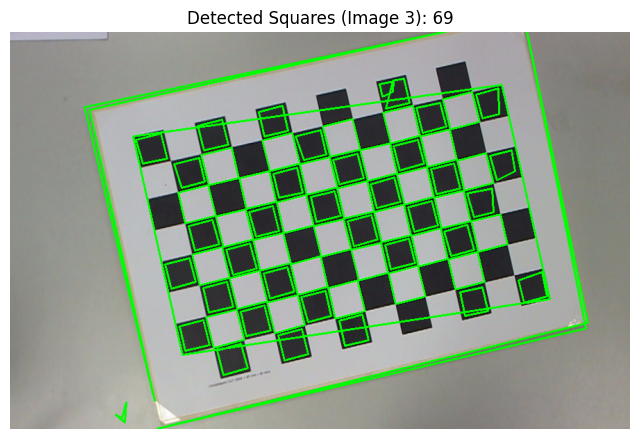

Detected Black Squares: 36
Detected White Squares: 33


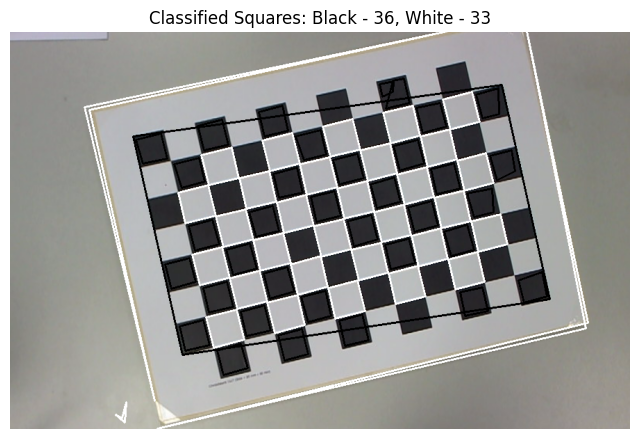

In [16]:
# Load the new image
image3 = cv2.imread('/content/Screenshot 2025-04-22 093429.png')

# Convert the image to grayscale
gray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized3 = cv2.equalizeHist(gray3)

# Adaptive thresholding
thresh3 = cv2.adaptiveThreshold(equalized3, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY_INV, 11, 3)

# Find contours
contours3, _ = cv2.findContours(thresh3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter squares
squares3 = []
for cnt in contours3:
    approx = cv2.approxPolyDP(cnt, 0.05 * cv2.arcLength(cnt, True), True)
    area = cv2.contourArea(cnt)
    if len(approx) == 4 and area > 100:
        squares3.append(approx)

# Draw the detected squares on the image
output_img3 = image3.copy()
cv2.drawContours(output_img3, squares3, -1, (0, 255, 0), 2)

# Show the detected squares
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(output_img3, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Squares (Image 3): {len(squares3)}")
plt.axis('off')
plt.show()

# Function to classify squares as black or white
def classify_squares(squares, image):
    black_squares = 0
    white_squares = 0

    for i, square in enumerate(squares):
        # Get the bounding box of each detected square
        x, y, w, h = cv2.boundingRect(square)

        # Crop the square from the image
        square_img = image[y:y+h, x:x+w]

        # Calculate the mean color of the square
        mean_color = cv2.mean(square_img)[:3]

        # Calculate the average brightness (mean of RGB values)
        avg_brightness = sum(mean_color) / 3

        # If the average brightness is below a certain threshold, classify it as black
        if avg_brightness < 127:
            black_squares += 1
        else:
            white_squares += 1

    return black_squares, white_squares

# Classify the squares in the current image
black_squares3, white_squares3 = classify_squares(squares3, image3)

# Show the result
print(f"Detected Black Squares: {black_squares3}")
print(f"Detected White Squares: {white_squares3}")

# Annotate the image with black and white square classification
output_img_colored3 = image3.copy()

for i, square in enumerate(squares3):
    x, y, w, h = cv2.boundingRect(square)

    # Crop the square to classify
    square_img = image3[y:y+h, x:x+w]
    mean_color = cv2.mean(square_img)[:3]
    avg_brightness = sum(mean_color) / 3

    # Classify as black or white based on brightness
    color = (0, 0, 0) if avg_brightness < 127 else (255, 255, 255)

    # Draw rectangle and annotate the square
    cv2.drawContours(output_img_colored3, [square], -1, color, 2)

# Show the final image with annotated squares
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(output_img_colored3, cv2.COLOR_BGR2RGB))
plt.title(f"Classified Squares: Black - {black_squares3}, White - {white_squares3}")
plt.axis('off')
plt.show()
